# Kiva Crowdfunding High-Level Activity Analysis Using EDA
By: Hans Darmawan

In [196]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
import warnings 

pd.set_option("display.float_format", lambda x: "%.2f" % x)
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore') 



## 1. Background

XYZ company is an investment company that exists in the world. Usually, the company have activities to invest the capital to small and medium enterprises. As the part of their CSR (Corporate Social Responsibility), the company have an idea to invest to the crowdfunding activities. While doing a research, the company found a website called Kiva.org. Kiva.org is an online crowdfunding site that helps the impoverished by lending more than $1 billion to more than 2 million people. The concept of this crowdfunding site by  determining the poverty level of each borrower is essential for setting investment priorities.

After understanding the business processes of Kiva, the company have interests to lend their capital into the campaigns. But, because the company have a very small knowledge to determine which campaigns are eligible or not, the company have decided to do the analysis of campaign history datasets based on Kaggle. The company hope that with these analysis, they have directions to lend their capital into the campaigns those are suitable for theirs.

## 2. Scope of Work

As the first time of exploring Kiva Datasets, there are scope of works needed to be stated, which are:
- The historical data in the datasets might be not representative regarding to the current data.
- The projects not involved the Machine Learning Feature due the approach is EDA. 
- The analysis scope will be univariate analysis for each categoric values and correlations for each numeric values.

## 3. Data Wrangling

Before deep diving into the business perspectives, we need to do the data wrangling. This process is needed to ensure the raw data transformed into a format suitable for analysis. According to Pete Aven, data wrangling is the process of transforming data from one shape into another to prepare it for analysis and deliver some unified results.

### a. Discovery

Loading the `kiva_loan.csv` via `pandas`.

Please download the Kiva Dataset (`kiva_loan.csv`) from here:
https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding?select=kiva_loans.csv

In [158]:
df = pd.read_csv("kiva_loan.csv")
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular
2,653068,150.00,150.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,bullet
3,653063,200.00,200.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,irregular
4,653084,400.00,400.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,monthly


Regarding on the 5 tops data and information on the Kaggle, here are the list of the columns and their description:

| Column Id     | Description                                                  |
|---------------|--------------------------------------------------------------|
| id            | Unique ID for loan                                           |
| funded_amount | The amount disbursed by Kiva to the field agent(USD)         |
| loan_amount   | The amount disbursed by the field agent to the borrower(USD) |
| activity      | More granular category                                       |
| sector        | High level category                                          |
| use           | Exact usage of loan amount                                   |
| country_code  | ISO country code of country in which loan was disbursed      |
| country       | Full country name of country in which loan was disbursed     |
| region        | Full region name within the country                          |
| currency      | The currency in which the loan was disbursed                 |

### b. Structuring

Exploring the structure of the data (as known as the metadata).

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   partner_id          657698 non-null  float64
 10  posted_time         671205 non-null  object 
 11  funded_time         622874 non-null  object 
 12  term_in_months      671205 non-null  float64
 13  lender_count        671205 non-null  int64  
 14  repayment_interval  671205 non-null  object 
dtypes: float64(4), int64(2), object(9)

Some of these values can be converted into several data types. The *_time columns will be converted into datetime data type.

In [160]:
datetime64 = ["posted_time", "funded_time"]
for items in datetime64:
    df[items] = pd.to_datetime(df[items])

All object data types (except use) will be converted into category data type.

In [161]:
categories =["id", "activity", "sector", "country", "region", "currency", "partner_id", "repayment_interval"]
df[categories] = df[categories].astype("category")

Seeing the structure again after converting several informations into several data types.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  category           
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  category           
 4   sector              671205 non-null  category           
 5   use                 666973 non-null  object             
 6   country             671205 non-null  category           
 7   region              614405 non-null  category           
 8   currency            671205 non-null  category           
 9   partner_id          657698 non-null  category           
 10  posted_time         671205 non-null  datetime64[ns, UTC]
 11  funded_time         622874 non-null  datetime64[ns, UTC]
 12  term_in_months  

Founded that the memory usage decreased from 76 MB to 48 MB.

### c. Cleaning

Checking duplicated values.

In [163]:
df.duplicated().sum()

0

Founded that there are no duplicated values in this data. Now, checking on the missing values.

In [164]:
df.isnull().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country                   0
region                56800
currency                  0
partner_id            13507
posted_time               0
funded_time           48331
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

Based on the informations above, founded that there are 4 columns having the empty values.

<Axes: >

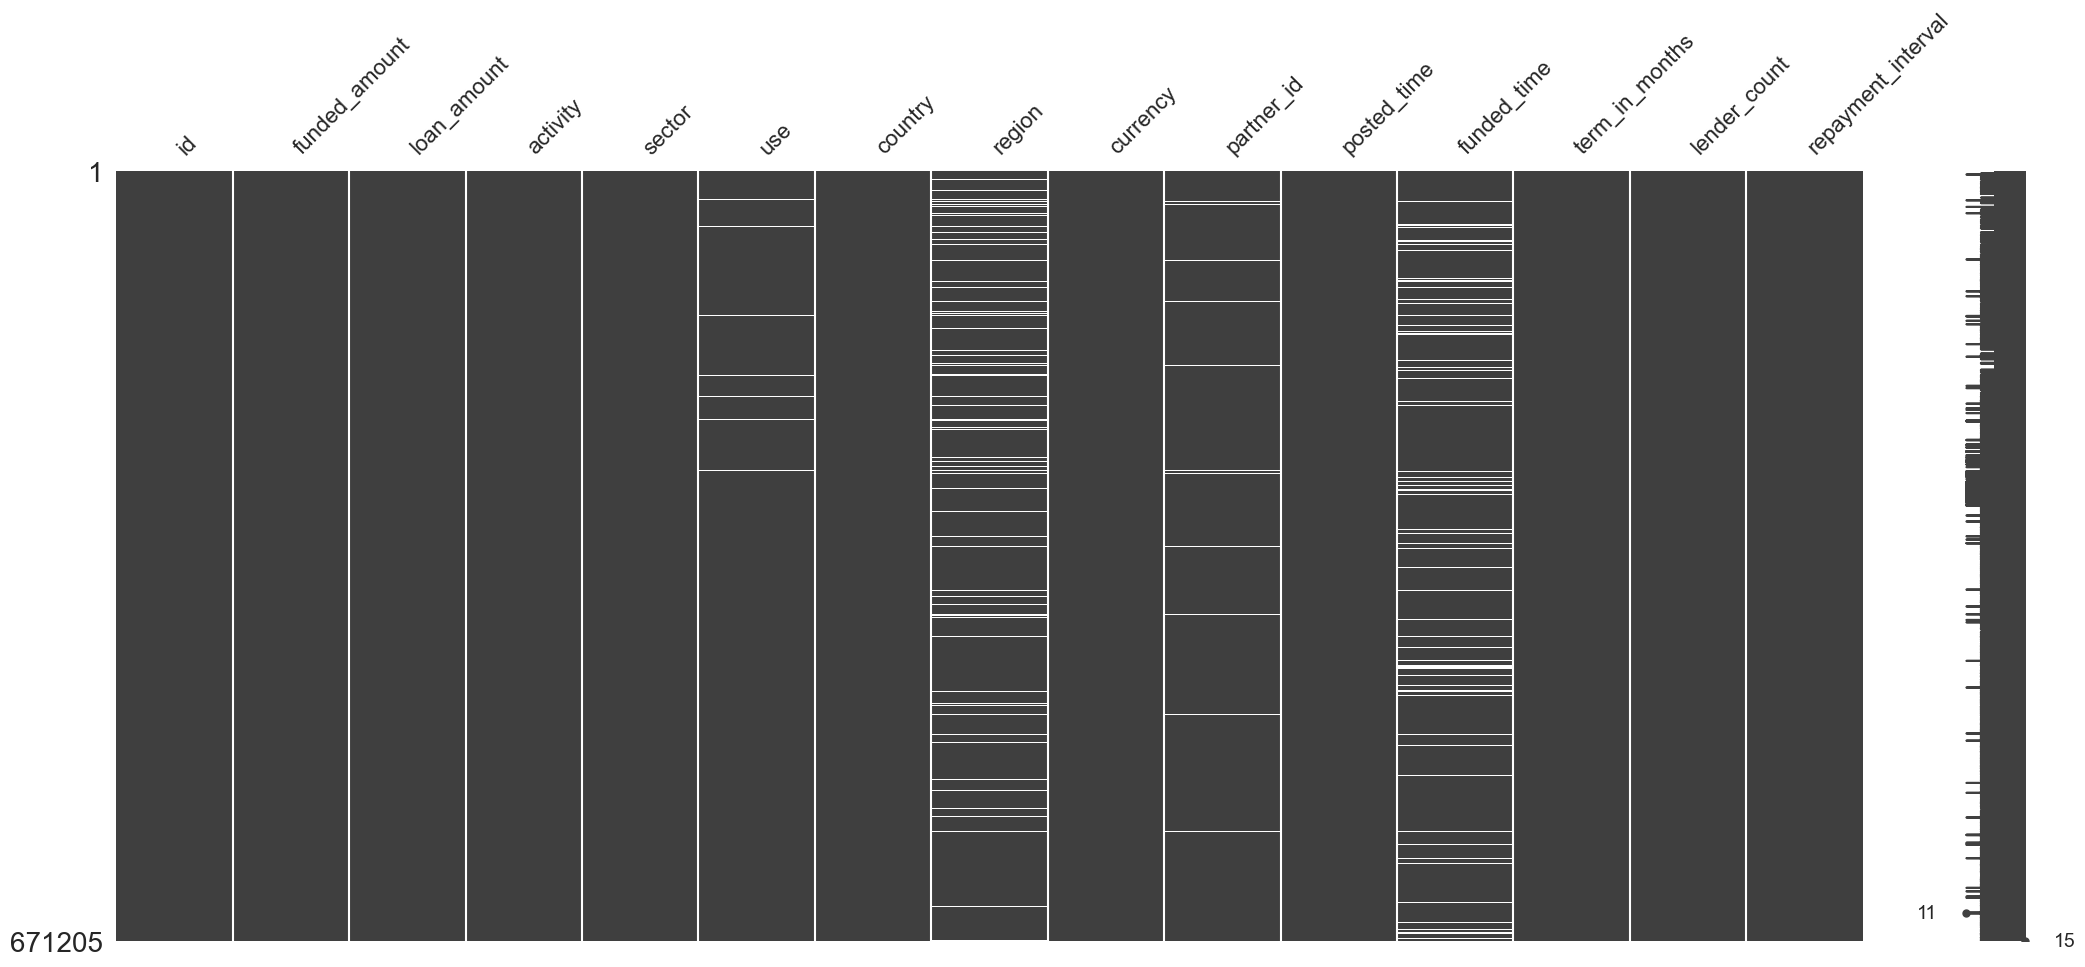

In [165]:
msno.matrix(df)

The columns those having missing values will be still useful for the analysis, so it is decided that all of the columns won't be dropped. Instead of dropping them, we can fill out the empty values. For the `use` columns, "Not Available" will be filled.

In [166]:
df["use"] = df["use"].fillna("Not Available")

For `partner_id,` it will be filled with zeros.

In [167]:
df["partner_id"] = df["partner_id"].astype("object") #need to reconvert to object because we cannot directly fill zeros with category type.
df["partner_id"] = df["partner_id"].fillna("0")
df["partner_id"] = df["partner_id"].astype("category")

Same like `use` columns, the `region` will be also filled with "Not available," but the treatment will be same like `partner_id`.

In [168]:
df["region"] = df["region"].astype("object")
df["region"] = df["region"].fillna("Not Available")
df["region"] = df["region"].astype("category")

And then, for `funded_time,` it will be filled with "1900-01-01 00:00:00+00:00."

In [169]:
df["funded_time"] = df["funded_time"].fillna("1900-01-01 00:00:00+00:00")

Seeing the matrix again after done filling the missing values.

<Axes: >

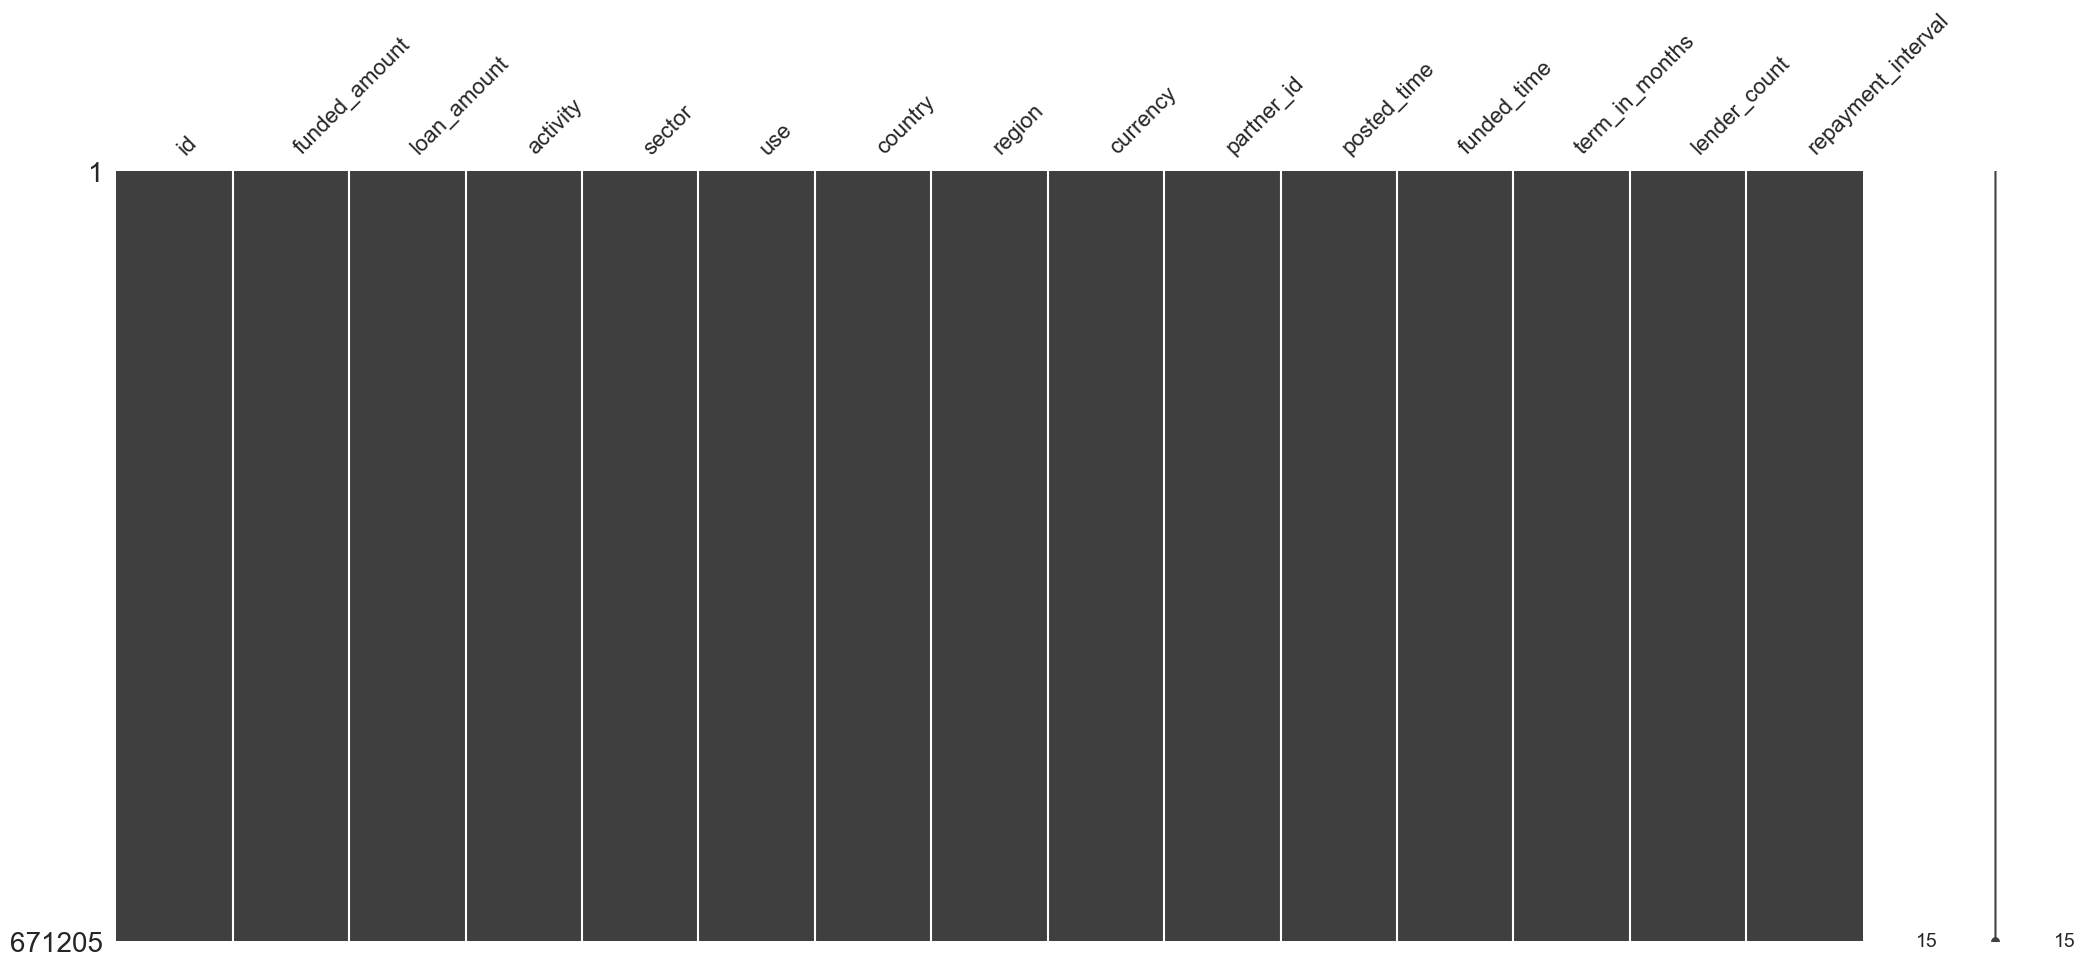

In [170]:
msno.matrix(df)

Finally, no missing values and good to go for next steps !

### d. Enriching

The `kiva_loan.csv` does not have the information of currency names. So in this case, we will add the lookup columns based on `iso_4217_currencies.csv` `Currency` columns into `kiva_loan.csv` `currency` columns. `df2` will be refer to `iso_4217_currencies.csv` and `df` will be refer to `kiva_loan.csv`. Here we have 2 different datasets head:

In [171]:
df2 = pd.read_csv("iso_4217_currencies.csv", sep=";")
df2.head()

,Entity,Currency,Code,Minor Unit
0,AFGHANISTAN,Afghani,AFN,2
1,ÅLAND ISLANDS,Euro,EUR,2
2,ALBANIA,Lek,ALL,2
3,ALGERIA,Algerian Dinar,DZD,2
4,AMERICAN SAMOA,US Dollar,USD,2


In [172]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular
2,653068,150.00,150.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,bullet
3,653063,200.00,200.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,irregular
4,653084,400.00,400.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,monthly


Next thing, to make the dictionary of currenct code and currency list in df2.

In [173]:
currency_code_2 = df2["Code"].to_list() # keys
currency_name_2 = df2["Currency"].to_list() # values
currency_2 = {k:v for k,v in zip(currency_code_2, currency_name_2)} # dictionary comprehension

Applying the new column into the df.

In [174]:
df["currency_name"] = df["currency"].apply(lambda x: currency_2.get(x, "Unknown")) 

In [175]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,currency_name
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular,Pakistan Rupee
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular,Pakistan Rupee
2,653068,150.00,150.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,bullet,Indian Rupee
3,653063,200.00,200.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,irregular,Pakistan Rupee
4,653084,400.00,400.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,monthly,Pakistan Rupee


Finally, we can see that the new `currency_name` is now appeared.

### e. Validating

While looking on the Kiva Dataset, we noticed that the repayment_interval is a lower case string. If we see other columns, the first character of the string starts with capital.

In [176]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,currency_name
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,irregular,Pakistan Rupee
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,irregular,Pakistan Rupee
2,653068,150.00,150.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,bullet,Indian Rupee
3,653063,200.00,200.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,irregular,Pakistan Rupee
4,653084,400.00,400.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,monthly,Pakistan Rupee


So, regarding to the previous point, we will make this column more proper by change the case into Title case.

In [177]:
df["repayment_interval"] = df["repayment_interval"].str.title().astype("category")
df["repayment_interval"].unique()

['Irregular', 'Bullet', 'Monthly', 'Weekly']
Categories (4, object): ['Bullet', 'Irregular', 'Monthly', 'Weekly']

In [178]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,funded_time,term_in_months,lender_count,repayment_interval,currency_name
0,653051,300.00,300.00,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,Lahore,PKR,247.00,2014-01-01 06:12:39+00:00,2014-01-02 10:06:32+00:00,12.00,12,Irregular,Pakistan Rupee
1,653053,575.00,575.00,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.00,2014-01-01 06:51:08+00:00,2014-01-02 09:17:23+00:00,11.00,14,Irregular,Pakistan Rupee
2,653068,150.00,150.00,Transportation,Transportation,To repair their old cycle-van and buy another ...,India,Maynaguri,INR,334.00,2014-01-01 09:58:07+00:00,2014-01-01 16:01:36+00:00,43.00,6,Bullet,Indian Rupee
3,653063,200.00,200.00,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.00,2014-01-01 08:03:11+00:00,2014-01-01 13:00:00+00:00,11.00,8,Irregular,Pakistan Rupee
4,653084,400.00,400.00,Milk Sales,Food,to purchase one buffalo.,Pakistan,Abdul Hakeem,PKR,245.00,2014-01-01 11:53:19+00:00,2014-01-01 19:18:51+00:00,14.00,16,Monthly,Pakistan Rupee


Finally, if we see the repayment_interval, now the string is title case instead of lower case.

## 4. Exploratory Data Analysis (and The Recommendations)

Before deep-diving into the EDA, let's see again the structure of the Kiva Dataset.

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  category           
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  category           
 4   sector              671205 non-null  category           
 5   use                 671205 non-null  object             
 6   country             671205 non-null  category           
 7   region              671205 non-null  category           
 8   currency            671205 non-null  category           
 9   partner_id          671205 non-null  category           
 10  posted_time         671205 non-null  datetime64[ns, UTC]
 11  funded_time         671205 non-null  datetime64[ns, UTC]
 12  term_in_months  

In [180]:
df.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.00,671205.00,671205.00,671205.00
mean,786.00,842.40,13.74,20.59
std,1130.40,1198.66,8.60,28.46
min,0.00,25.00,1.00,0.00
25%,250.00,275.00,8.00,7.00
50%,450.00,500.00,13.00,13.00
75%,900.00,1000.00,14.00,24.00
max,100000.00,100000.00,158.00,2986.00


In [181]:
df.describe(include=["category","object"])

,id,activity,sector,use,country,region,currency,partner_id,repayment_interval,currency_name
count,671205,671205,671205,671205,671205,671205,671205,671205.00,671205,671205
unique,671205,163,15,424913,87,12696,67,367.00,4,67
top,653047,Farming,Agriculture,to buy a water filter to provide safe drinking...,Philippines,Not Available,PHP,145.00,Monthly,Philippine Peso
freq,1,72955,180302,5217,160441,56800,160440,107188.00,342717,160440


In [182]:
df.describe(include="datetime64[ns, UTC]")

,posted_time,funded_time
count,671205,671205
mean,2015-11-10 09:21:01.779441664+00:00,2007-07-16 15:10:23.134585344+00:00
min,2014-01-01 04:49:26+00:00,1900-01-01 00:00:00+00:00
25%,2014-12-17 13:02:38+00:00,2014-10-17 17:46:14+00:00
50%,2015-11-20 15:46:13+00:00,2015-10-16 01:32:19+00:00
75%,2016-10-06 07:24:48+00:00,2016-09-21 22:24:02+00:00
max,2017-07-26 06:31:46+00:00,2017-07-26 02:09:43+00:00


### 1. Which activity is the most crowdfunded ?

In [183]:
insight = df.pivot_table(index="activity", values="id", observed=False, aggfunc="count").reset_index()
insight = insight.rename(columns={"activity":"Activity", "id":"Count of Transactions"})
insight["Activity"] = insight["Activity"].astype("object")
insight = insight.sort_values("Count of Transactions", ascending=False).head()
insight["%"] = insight["Count of Transactions"] / sum(insight["Count of Transactions"]) * 100
insight["%"] = round(insight["%"],0)
insight

,Activity,Count of Transactions,%
57,Farming,72955,32.00
72,General Store,64729,29.00
112,Personal Housing Expenses,32448,14.00
65,Food Production/Sales,28106,12.00
1,Agriculture,27023,12.00


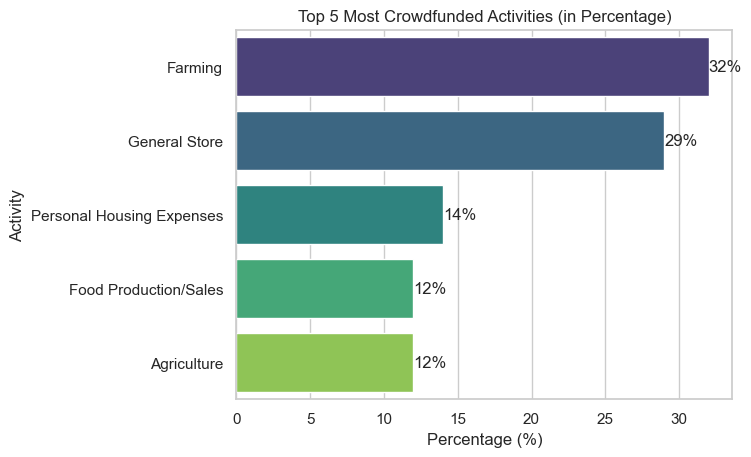

In [184]:
ax = sns.barplot(insight,x="%", y="Activity", hue="Activity", orient="h", palette="viridis")
plt.title("Top 5 Most Crowdfunded Activities (in Percentage)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%")
plt.xlabel("Percentage (%)")
plt.show()

Farming is the most crowdfunded activities, followed by General Store, Personal Housing Expenses, Food Production/Sales, and Agriculture. By focusing on these activities, XYZ can directly address what Kiva borrowers needed.

### 2. Which sector is the most crowdfunded ?

In [185]:
insight = df.pivot_table(index="sector", values="id", observed=False, aggfunc="count").reset_index()
insight = insight.rename(columns={"sector":"Sector", "id":"Count of Sector"})
insight["Sector"] = insight["Sector"].astype("object")
insight = insight.sort_values("Count of Sector", ascending=False).head()
insight["%"] = insight["Count of Sector"] / sum(insight["Count of Sector"]) * 100
insight["%"] = round(insight["%"],0)
insight

,Sector,Count of Sector,%
0,Agriculture,180302,34.00
6,Food,136657,26.00
11,Retail,124494,24.00
12,Services,45140,9.00
10,Personal Use,36385,7.00


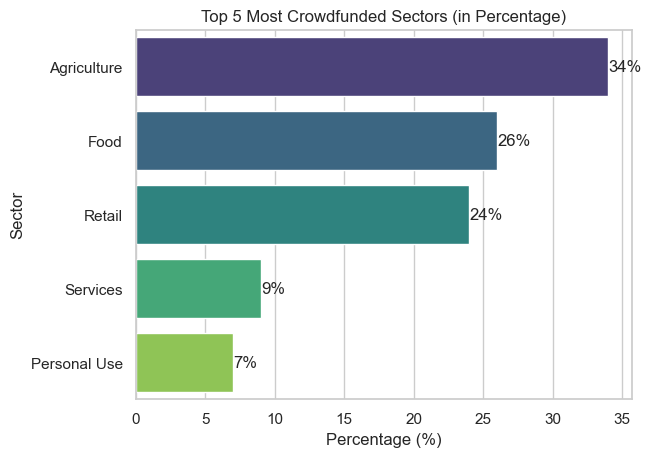

In [186]:
ax = sns.barplot(insight,x="%", y="Sector", hue="Sector", orient="h", palette="viridis")
plt.title("Top 5 Most Crowdfunded Sectors (in Percentage)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%")
plt.xlabel("Percentage (%)")
plt.show()

Agriculture is the most crowdfunded sectors, followed by Food, Retail, Services, and Personal Use. By breaking down the sectors, XYZ can focus on the sectors that contributing the long-term sustainability of their enterprises.

### 3. Which country is the most crowdfunded ?

In [187]:
insight = df.pivot_table(index="country", values="id", observed=False, aggfunc="count").reset_index()
insight = insight.rename(columns={"country":"Country", "id":"Count of Transactions"})
insight["Country"] = insight["Country"].astype("object")
insight = insight.sort_values("Count of Transactions", ascending=False).head()
insight["%"] = insight["Count of Transactions"] / sum(insight["Count of Transactions"]) * 100
insight["%"] = round(insight["%"],0)
insight

,Country,Count of Transactions,%
59,Philippines,160441,47.00
34,Kenya,75825,22.00
22,El Salvador,39875,12.00
11,Cambodia,34836,10.00
54,Pakistan,26857,8.00


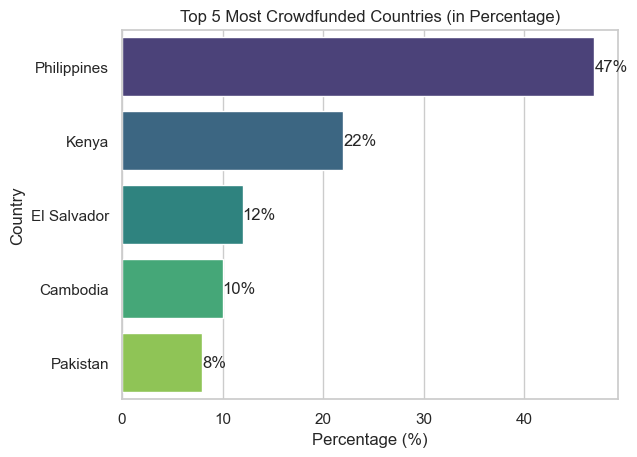

In [188]:
ax = sns.barplot(insight,x="%", y="Country", hue="Country", orient="h", palette="viridis")
plt.title("Top 5 Most Crowdfunded Countries (in Percentage)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%")
plt.xlabel("Percentage (%)")
plt.show()

Most of the crowdfunding countries take place at Philippines, followed by Kenya, El Salvador, Cambodia, and Pakistan. By knowing this insight, XYZ is able to consider to deep dive which country is suitable for their initial investments.

### 4. Which currency is the most used for crowdfunding ?

In [189]:
insight = df.pivot_table(index=["currency","currency_name"], values="id", observed=False, aggfunc="count").reset_index()
insight = insight.rename(columns={"currency":"Currency Code", "id":"Count of Transactions", "currency_name":"Currency Name"})
insight["Currency Code"] = insight["Currency Code"].astype("object")
insight = insight.sort_values("Count of Transactions", ascending=False).head()
insight["%"] = insight["Count of Transactions"] / sum(insight["Count of Transactions"]) * 100
insight["%"] = round(insight["%"],0)
insight

,Currency Code,Currency Name,Count of Transactions,%
2856,PHP,Philippine Peso,160440,40.00
3808,USD,US Dollar,105494,27.00
1564,KES,Kenyan Shilling,75311,19.00
1700,KHR,Riel,29498,7.00
2924,PKR,Pakistan Rupee,26856,7.00


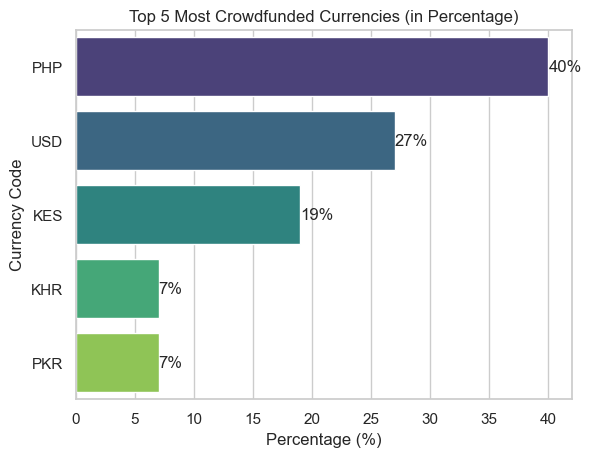

In [190]:
ax = sns.barplot(insight,x="%", y="Currency Code", hue="Currency Code", orient="h", palette="viridis")
plt.title("Top 5 Most Crowdfunded Currencies (in Percentage)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%")
plt.xlabel("Percentage (%)")
plt.show()

In lining into the previous insight, PHP (Philippines Peso) is the most used currency for the crowdfunding, followed by USD (United States Dollar), KES (Kenyan Shilling), KHR (Cambodian Riel), and PKR (Pakistani Rupee). By knowing these top five currencies used on Kiva, XYZ is able to ensure to allocate the cash efficiently.

### 5. Which repayment interval is the most used for paying the crowdfunds ?

In [191]:
insight = df.pivot_table(index="repayment_interval", values="id", observed=False, aggfunc="count").reset_index()
insight = insight.rename(columns={"repayment_interval":"Repayment Interval", "id":"Count of Transactions"})
insight["Repayment Interval"] = insight["Repayment Interval"].astype("object")
insight = insight.sort_values("Count of Transactions", ascending=False).head()
insight["%"] = insight["Count of Transactions"] / sum(insight["Count of Transactions"]) * 100
insight["%"] = round(insight["%"],0)
insight

,Repayment Interval,Count of Transactions,%
2,Monthly,342717,51.00
1,Irregular,257158,38.00
0,Bullet,70728,11.00
3,Weekly,602,0.00


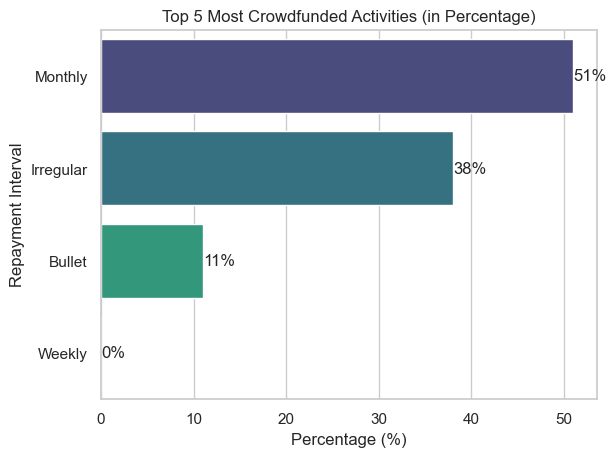

In [192]:
ax = sns.barplot(insight,x="%", y="Repayment Interval", hue="Repayment Interval", orient="h", palette="viridis")
plt.title("Top 5 Most Crowdfunded Activities (in Percentage)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%")
plt.xlabel("Percentage (%)")
plt.show()

There are only four repayment intervals, which the most popular repayment intervals starts from monthly, irregular, bullet, until weekly (which has 0%). This information gives XYZ Company insight into the repayment preferences and capacities of Kiva's borrowers.

### 6. For numeric columns, are the data normally distributed ?

In this case, we will use the The Shapiro–Wilk test to do the normality test. This test is one of the formal test of the assumption of normality test that is recommend for general purpose. Several studies have shown that the S–W test has good statistical power against a wide variety of non-normal distributions.

Ho: The data is normally distributed.

Ha: The data is not normally distributed.

The purpose of doing this test is to determine the correlation test. If the data is normally distributed, then we will use Pearson Correlation Test to seek the correlation between these values. Otherwise, we will use Spearman Correlation Test.

In [193]:
numerics = df.select_dtypes(["float64","int64"]).columns.to_list()
result = []
for n in numerics:
    result.append(shapiro(df[n]))
result = pd.DataFrame(result)
result.insert(0,"name", numerics)
result["alpha"] = 0.05
result["reject Ho ?"] = result["pvalue"] <= result["alpha"]
result

,name,statistic,pvalue,alpha,reject Ho ?
0,funded_amount,0.51,0.00,0.05,True
1,loan_amount,0.51,0.00,0.05,True
2,term_in_months,0.70,0.00,0.05,True
3,lender_count,0.52,0.00,0.05,True


Conclusion: Reject Ho for all of numeric columns. It means that not enough evidences to state that all of these columns normally distributed.

### 7. How numeric columns correlating each other ?

Regarding number 6, all of the numeric columns are not normally distributed. It means, to measure the correlation between them, we need to use `Spearman` test instead of `Pearson` test.

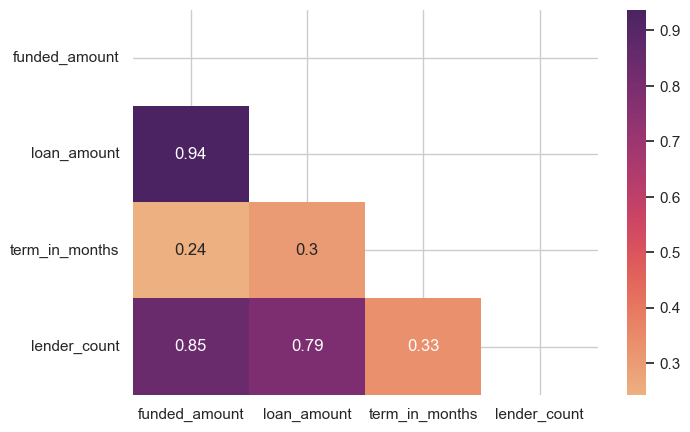

In [194]:
corr = df.corr(numeric_only=True, method='spearman')
matrix = np.triu(corr)
plt.figure(figsize=(7.5,5))
ax = sns.heatmap(corr, cmap="flare", annot=True, mask=matrix)
plt.show(ax)

Based on this correlation matrix, we currently can see how strong and associative between values. No correlation (0.0-0.1), low correlation (0.1-0.3), medium correlation (0.3-0.5), high correlation (0.5-0.7), and extremely high correlation (0.7-1) are the five levels into which it can be divided. Additionally noteworthy is the correlation's direction, where a positive correlation denotes a direct association and a negative correlation denotes an inverse relationship. Of course there is absolutely no direction if the correlation coefficient is zero as stated in above. Therefore, we can conclude that for each correlations :
- 0.94 between funded_amount and loan_amount: This indicates an extremely high positive correlation with direct association, suggesting that as the funded amount increases, the loan amount also tends to increase significantly.

- 0.85 between lender_count and funded_amount: This reflects a extremely positive correlation with direct association, suggesting that as the number of lender increases, the loan amount also tends to increase significantly.

- 0.79 between lender_count and loan_amount: This also shows a extremely positive correlation with direct association, suggesting that as the number of lender increases, the loan amount also tends to increase significantly.

- 0.33 between lender_count and term_in_months: This indicates a medium positive correlation with direct association, suggesting that as the number of lender increases, the monthly terms also tends to increase moderately.

- 0.30 between loan_amount and term_in_months: This reflects a medium positive correlation with direct association, suggesting that as the loan amount increases, the monthly terms also tends to increase moderately.

- 0.24 between term_in_months and funded_amount: This shows a low positive correlation with direct association, suggesting that as the monthly terms increases, the funded amount also tends to increase slightly.

# References

https://datatab.net/tutorial/spearman-correlation

https://docs.1010data.com/1010dataReferenceManual/DataTypesAndFormats/currencyUnitCodes.html#topic_m4v_rt3_5r__table_k2t_fv3_5r

https://www.dataversity.net/what-is-data-wrangling/

https://www.ibm.com/think/topics/data-wrangling

https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding/data

https://www.sciencedirect.com/topics/mathematics/spearman-correlation

https://www.sciencedirect.com/topics/mathematics/wilk-test